In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#file path
path = '../data/bisi_enterprise_store_2022_2024.csv'

#pandas dataframe
df = pd.read_csv(path)

df.head()

,InvoiceNo,TransactionDate,City,Channel,CustomerType,Product,Category,Quantity,NominalUnitPrice,DiscountRate,NominalTotalValue,CPI_Index,RealUnitPrice,RealTotalValue,GrossMargin,PaymentType,PromoFlag,CustomerID,Year,Month
0,INV1000000,2023-02-15,Lagos,Physical,SME,Detergent,Household,1,1338.26,0.0,1338.26,129.714286,1031.70,1031.70,200.74,Transfer,False,CUST1813,2023,2023-02-01
1,INV1000001,2024-11-07,Port Harcourt,Physical,Student,Tecno Phone,Electronics,1,168556.49,0.0,168556.49,177.714286,94846.90,94846.90,30340.17,Cash,False,CUST7636,2024,2024-11-01
2,INV1000002,2024-03-12,Enugu,Physical,Reseller,Toilet Roll,Household,2,5961.54,0.2,9538.46,159.428571,3739.32,5982.91,1430.77,Cash,True,CUST5686,2024,2024-03-01
3,INV1000003,2023-10-18,Onitsha,Online,Student,Body Cream,Beauty,2,17362.08,0.1,31251.74,148.000000,11731.14,21116.05,6875.38,POS,True,CUST6950,2023,2023-10-01
4,INV1000004,2022-06-20,Abuja,Online,Student,Biscuits,FMCG,1,506.70,0.0,506.70,111.428571,454.73,454.73,60.80,POS,False,CUST3464,2022,2022-06-01


In [3]:
# quick look at numbers of rows and columns
print("Dataset shape:", df.shape)
print('---------' * 10)
# checking the structure of the dataset
df.info()
print('---------' * 10)
#basic descriptive stats for numeric columns
print(df.describe())

Dataset shape: (50000, 20)
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          50000 non-null  object 
 1   TransactionDate    50000 non-null  object 
 2   City               50000 non-null  object 
 3   Channel            50000 non-null  object 
 4   CustomerType       50000 non-null  object 
 5   Product            50000 non-null  object 
 6   Category           50000 non-null  object 
 7   Quantity           50000 non-null  int64  
 8   NominalUnitPrice   50000 non-null  float64
 9   DiscountRate       50000 non-null  float64
 10  NominalTotalValue  50000 non-null  float64
 11  CPI_Index          50000 non-null  float64
 12  RealUnitPrice      50000 non-null  float64
 13  RealTotalValue     50000 non-null  float64
 14  

In [4]:
#checking for duplicates
duplicates = df.duplicated(subset="InvoiceNo").sum()
print("duplicate invoices:", duplicates)

duplicate invoices: 0


In [5]:
# checking for unique values for the categorical columns
categorical_cols = ['City', 'Channel', 'CustomerType',
       'Product', 'Category', 'PaymentType']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

City: 8 unique values
Channel: 2 unique values
CustomerType: 4 unique values
Product: 24 unique values
Category: 5 unique values
PaymentType: 4 unique values


In [6]:
# checking for missing values
print(df.isnull().sum())

InvoiceNo            0
TransactionDate      0
City                 0
Channel              0
CustomerType         0
Product              0
Category             0
Quantity             0
NominalUnitPrice     0
DiscountRate         0
NominalTotalValue    0
CPI_Index            0
RealUnitPrice        0
RealTotalValue       0
GrossMargin          0
PaymentType          0
PromoFlag            0
CustomerID           0
Year                 0
Month                0
dtype: int64


In [10]:
# Transaction date to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Date range
print("Date range:", df['TransactionDate'].min(), "to", df['TransactionDate'].max())

# Monthly count
monthly_count = df.groupby(df['TransactionDate'].dt.to_period('M')).size()
print(monthly_count.head())
print(monthly_count.tail())

Date range: 2022-01-01 00:00:00 to 2024-12-30 00:00:00
TransactionDate
2022-01    1404
2022-02    1285
2022-03    1432
2022-04    1426
2022-05    1391
Freq: M, dtype: int64
TransactionDate
2024-08    1404
2024-09    1373
2024-10    1424
2024-11    1381
2024-12    1325
Freq: M, dtype: int64


In [11]:
# Channel distribution
print(df['Channel'].value_counts(normalize=True))

# Customer Type distribution
print(df['CustomerType'].value_counts(normalize=True))

# City distribution
print(df['City'].value_counts(normalize=True))

# PromoFlag distribution
print(df['PromoFlag'].value_counts(normalize=True))


Channel
Physical    0.50256
Online      0.49744
Name: proportion, dtype: float64
CustomerType
Household    0.25218
SME          0.25004
Student      0.24912
Reseller     0.24866
Name: proportion, dtype: float64
City
Lagos            0.12704
Abuja            0.12542
Kano             0.12528
Onitsha          0.12488
Port Harcourt    0.12466
Benin            0.12458
Enugu            0.12448
Ibadan           0.12366
Name: proportion, dtype: float64
PromoFlag
False    0.59614
True     0.40386
Name: proportion, dtype: float64


In [12]:
# Verify Revenue calculations
df['Revenue_Nominal'] = df['Quantity'] * df['NominalUnitPrice'] * (1 - df['DiscountRate'])
df['Revenue_Real'] = df['Quantity'] * df['RealUnitPrice'] * (1 - df['DiscountRate'])

# Check if they match dataset totals
print("Nominal revenue diff:", (df['Revenue_Nominal'] - df['NominalTotalValue']).abs().sum())
print("Real revenue sample:")
print(df[['Revenue_Real','RealTotalValue']].head())


Nominal revenue diff: 49.633000041276006
Real revenue sample:
   Revenue_Real  RealTotalValue
0      1031.700         1031.70
1     94846.900        94846.90
2      5982.912         5982.91
3     21116.052        21116.05
4       454.730          454.73


In [ ]:
# Aggregate Revenue by Category
category_rev = df.groupby('Category')[['Revenue_Nominal','Revenue_Real','GrossMargin']].sum()
category_rev['MarginPercent'] = (category_rev['GrossMargin']/category_rev['Revenue_Nominal'])*100
print(category_rev.sort_values('Revenue_Nominal',ascending=False))


             Revenue_Nominal  Revenue_Real   GrossMargin  MarginPercent
Category                                                               
Electronics     3.206982e+09  2.359999e+09  5.772567e+08      18.000000
Fashion         4.035885e+08  2.980467e+08  1.008971e+08      25.000000
Beauty          2.610504e+08  1.925633e+08  5.743110e+07      22.000000
Household       1.018000e+08  7.480165e+07  1.527001e+07      15.000000
FMCG            2.149022e+07  1.579149e+07  2.578826e+06      12.000001


## Business interpretation

Electronics is a cash cow (volume + scale)

Fashion & Beauty are margin engines

FMCG is low-margin but may drive foot traffic

A balanced portfolio exists (good sign for modern retail)

In [ ]:
# Aggregate Revenue by Channel
category_rev = df.groupby('Category')[['Revenue_Nominal','Revenue_Real','GrossMargin']].sum()
category_rev['MarginPercent'] = (category_rev['GrossMargin']/category_rev['Revenue_Nominal'])*100
print(category_rev.sort_values('Revenue_Nominal',ascending=False))


             Revenue_Nominal  Revenue_Real   GrossMargin  MarginPercent
Category                                                               
Electronics     3.206982e+09  2.359999e+09  5.772567e+08      18.000000
Fashion         4.035885e+08  2.980467e+08  1.008971e+08      25.000000
Beauty          2.610504e+08  1.925633e+08  5.743110e+07      22.000000
Household       1.018000e+08  7.480165e+07  1.527001e+07      15.000000
FMCG            2.149022e+07  1.579149e+07  2.578826e+06      12.000001


In [15]:
# Aggregate Revenue by City
city_rev = df.groupby('City')[['Revenue_Nominal','Revenue_Real','GrossMargin']].sum()
city_rev['MarginPercent'] = (city_rev['GrossMargin']/city_rev['Revenue_Nominal'])*100
print(city_rev.sort_values('Revenue_Nominal',ascending=False))


               Revenue_Nominal  Revenue_Real  GrossMargin  MarginPercent
City                                                                    
Enugu             5.218968e+08  3.817829e+08  98291380.93      18.833490
Lagos             5.126906e+08  3.788843e+08  96574130.20      18.836726
Benin             5.117582e+08  3.760954e+08  96503961.73      18.857337
Onitsha           4.971668e+08  3.653134e+08  93650843.01      18.836905
Port Harcourt     4.938948e+08  3.676188e+08  93233276.17      18.877152
Kano              4.919389e+08  3.596378e+08  92713735.24      18.846595
Ibadan            4.885759e+08  3.617574e+08  92286548.87      18.888887
Abuja             4.769889e+08  3.501124e+08  90179899.00      18.906079


In [16]:
# Time Series Aggregation

# Year-Month column
df['YearMonth'] = df['TransactionDate'].dt.to_period('M').dt.to_timestamp()

# Monthly revenue
monthly_rev = df.groupby('YearMonth')[['Revenue_Nominal','Revenue_Real']].sum()
print(monthly_rev.head(12))  # first year sample


            Revenue_Nominal  Revenue_Real
YearMonth                                
2022-01-01     1.033801e+08  1.033801e+08
2022-02-01     1.044106e+08  1.020774e+08
2022-03-01     1.181181e+08  1.129545e+08
2022-04-01     1.135760e+08  1.062877e+08
2022-05-01     1.159017e+08  1.061927e+08
2022-06-01     1.100128e+08  9.872943e+07
2022-07-01     1.104658e+08  9.714325e+07
2022-08-01     1.174464e+08  1.012469e+08
2022-09-01     1.063420e+08  8.990264e+07
2022-10-01     1.094550e+08  9.078024e+07
2022-11-01     1.119431e+08  9.111646e+07
2022-12-01     1.179995e+08  9.429185e+07


In [17]:
# Quick Promo Impact Check
promo_rev = df.groupby('PromoFlag')[['Revenue_Nominal','Revenue_Real']].sum()
promo_rev['PercentOfTotal'] = (promo_rev['Revenue_Nominal']/promo_rev['Revenue_Nominal'].sum())*100
print(promo_rev)


           Revenue_Nominal  Revenue_Real  PercentOfTotal
PromoFlag                                               
False         2.487174e+09  1.832873e+09        62.25857
True          1.507737e+09  1.108329e+09        37.74143


## Discounts

Discount usage ~40% promo flag True; ~60% no promo 

Business interpretation:
- Promotions play a significant role in moving volume
- Nigeria retail often depends on festive/seasonal promotions (Back-to-school, December, Ramadan, Election cycles, etc.)

# Visualizations

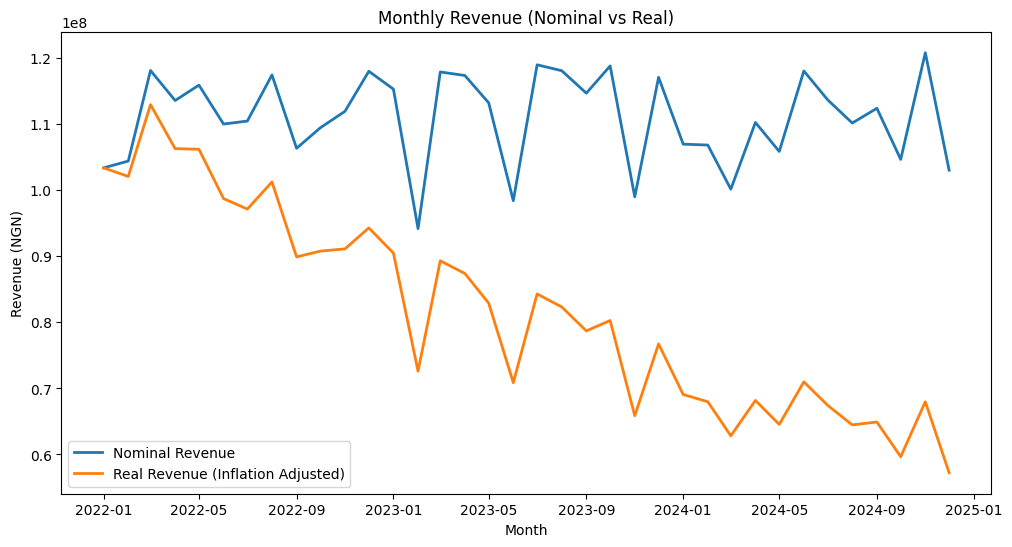

In [18]:
#Revenue Over Time (Nominal vs Real)
#How does retail revenue evolve over time between 2022–2024?

monthly = df.groupby('YearMonth')[['Revenue_Nominal','Revenue_Real']].sum()

plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['Revenue_Nominal'], label='Nominal Revenue', linewidth=2)
plt.plot(monthly.index, monthly['Revenue_Real'], label='Real Revenue (Inflation Adjusted)', linewidth=2)
plt.title('Monthly Revenue (Nominal vs Real)')
plt.xlabel('Month')
plt.ylabel('Revenue (NGN)')
plt.legend()
plt.show()


<Axes: title={'center': 'Revenue by Category'}, ylabel='Category'>

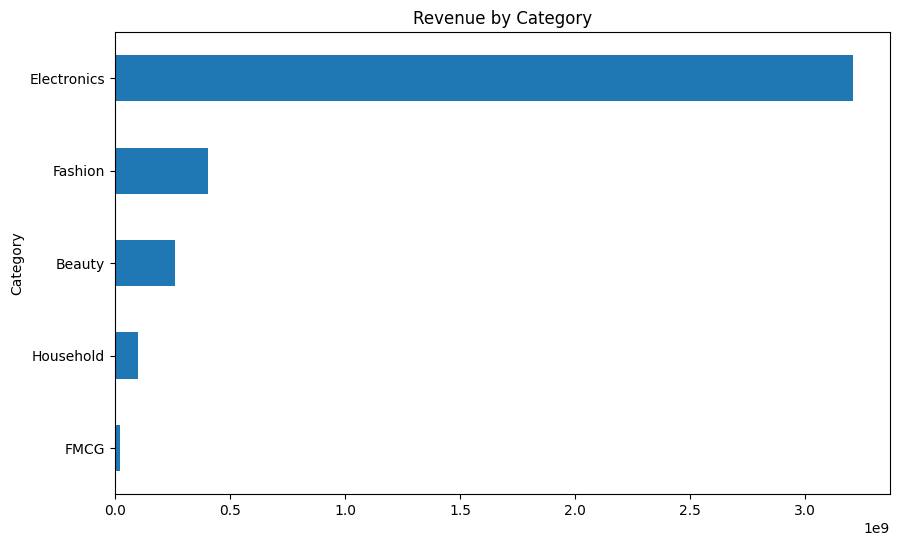

In [25]:
# Which product categories drive revenue, volume, and profitability
cat = df.groupby('Category')[['Quantity','Revenue_Nominal','GrossMargin']].sum()
cat['MarginPercent'] = (cat['GrossMargin']/cat['Revenue_Nominal'])*100

cat.sort_values('Revenue_Nominal').plot(
    kind='barh',
    y='Revenue_Nominal',
    legend=False,
    figsize=(10,6),
    title='Revenue by Category'
)

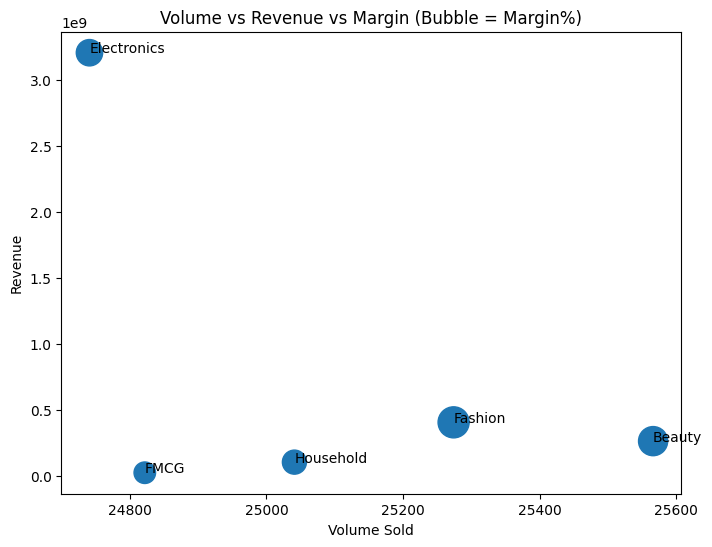

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(cat['Quantity'], cat['Revenue_Nominal'], s=cat['MarginPercent']*20)
for c in cat.index:
    plt.text(cat['Quantity'][c], cat['Revenue_Nominal'][c], c)
plt.xlabel('Volume Sold')
plt.ylabel('Revenue')
plt.title('Volume vs Revenue vs Margin (Bubble = Margin%)')
plt.show()


          Revenue_Nominal   GrossMargin  MarginPercent
Channel                                               
Online       1.978144e+09  3.728737e+08      18.849672
Physical     2.016767e+09  3.805601e+08      18.869811


<Axes: title={'center': 'Revenue by Channel'}, xlabel='Channel'>

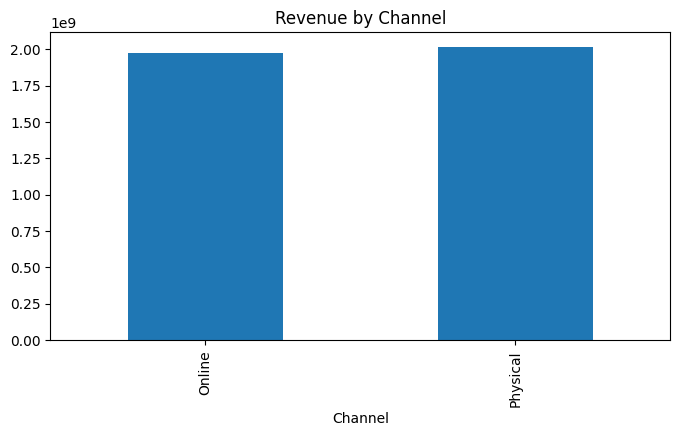

In [21]:
# Channel performance
# How do Online and Physical channels differ in revenue, margin, and promo usage?
chan = df.groupby('Channel')[['Revenue_Nominal','GrossMargin']].sum()
chan['MarginPercent'] = (chan['GrossMargin']/chan['Revenue_Nominal'])*100
print(chan)
chan['Revenue_Nominal'].plot(kind='bar', title='Revenue by Channel', figsize=(8,4))


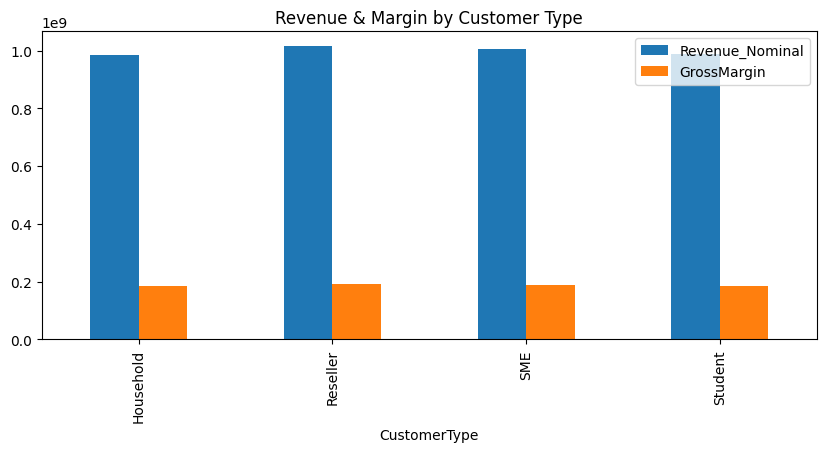

In [23]:
# Customer Type Behavior
# Do Household, Student, SME, and Reseller customers behave differently in spending, margin, and category mix?
cust = df.groupby('CustomerType')[['Quantity','Revenue_Nominal','GrossMargin']].sum()
cust['MarginPercent'] = cust['GrossMargin']/cust['Revenue_Nominal']*100

cust[['Revenue_Nominal','GrossMargin']].plot(kind='bar', figsize=(10,4))
plt.title('Revenue & Margin by Customer Type')
plt.show()


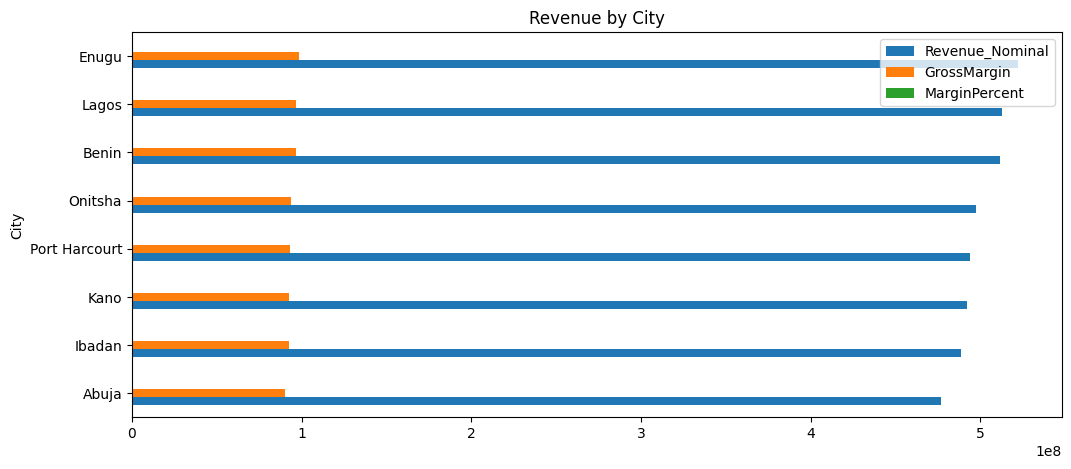

In [27]:
# City Dynamics
# Which cities drive performance and how do their margins compare?
city = df.groupby('City')[['Revenue_Nominal','GrossMargin']].sum()
city['MarginPercent'] = city['GrossMargin']/city['Revenue_Nominal']*100
city.sort_values('Revenue_Nominal').plot(kind='barh', figsize=(12,5))
plt.title('Revenue by City')
plt.show()


In [28]:
# Promo Impact on Sales & Margin
 
promo = df.groupby('PromoFlag')[['Quantity','Revenue_Nominal','GrossMargin']].sum()
promo['MarginPercent'] = promo['GrossMargin']/promo['Revenue_Nominal']*100
print(promo)


           Quantity  Revenue_Nominal   GrossMargin  MarginPercent
PromoFlag                                                        
False         74828     2.487174e+09  4.690883e+08      18.860291
True          50616     1.507737e+09  2.843454e+08      18.859092


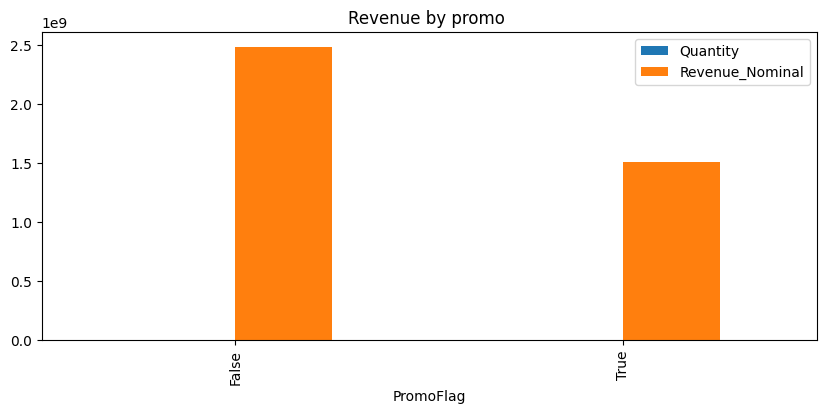

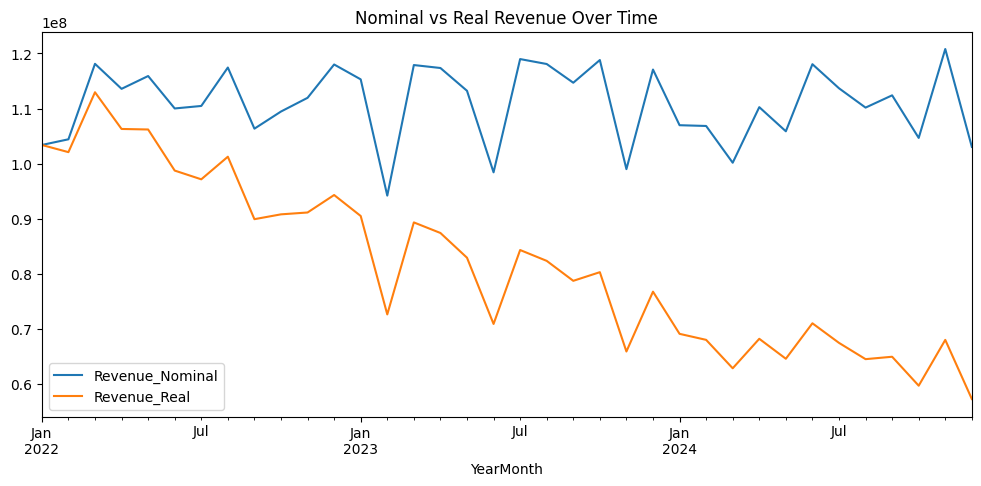

In [30]:
# Inflatio vs Real Demand
monthly = df.groupby('YearMonth')[['Revenue_Nominal','Revenue_Real']].sum()
monthly.plot(figsize=(12,5), title='Nominal vs Real Revenue Over Time')
plt.show()
